In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.6.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
class_names = ['top','trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt','sneaker','bat', 'boot']

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

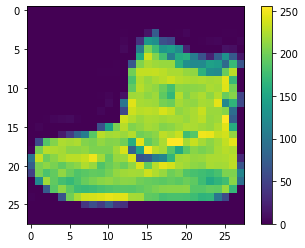

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

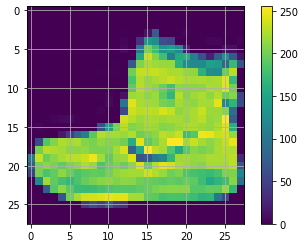

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show>

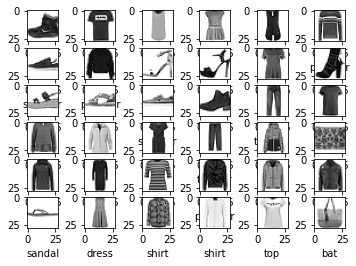

In [15]:
plt.figure()
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

In [16]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4929 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3091 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2936 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2782 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2654 - accuracy: 0.9026
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2457 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3360 - accuracy: 0.8834
Test accuracy 0.883400022983551


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[1]

array([7.6723018e-06, 1.5034504e-13, 9.9980658e-01, 2.8633853e-12,
       1.3059399e-04, 1.7528971e-13, 5.5155982e-05, 3.4881966e-19,
       7.5130603e-11, 2.0955417e-15], dtype=float32)

In [22]:
np.argmax(predictions[1])

2

In [23]:
test_labels[1]

2